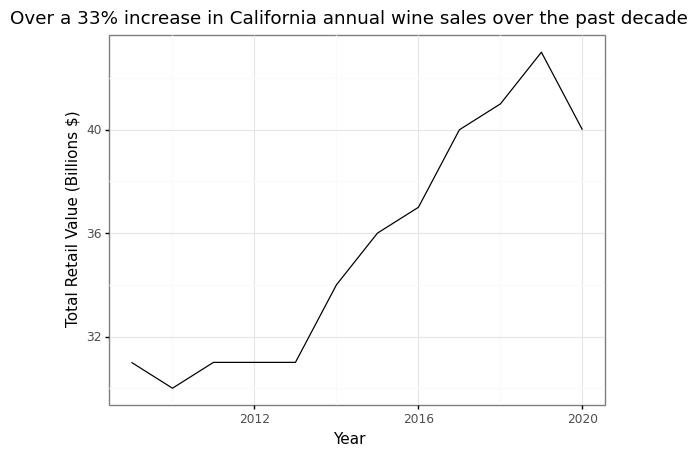

<ggplot: (679931898)>

In [6]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_bw, facet_wrap, geom_smooth, geom_line, scale_x_discrete, scale_x_date, theme, element_text
import numpy as np

df = pd.read_csv('california_wine_shipments.csv')
df = df.set_axis(['Year', 'All Shipments', 'US Shipments', 'Total Retail Value'], axis=1)
df['Total Retail Value'] = pd.to_numeric(df['Total Retail Value'].str.extract('(\d+)').squeeze())
display(
    ggplot(df,
       aes('Year', 'Total Retail Value'))
       + geom_line()
       + theme_bw()
       + labs(
           y='Total Retail Value (Billions $)',
           title='Over a 33% increase in California annual wine sales over the past decade'
       )
)


    Year Reported Bearing Reported Non-Bearing Reported Total  Estimated Total
0   2020          435,415               15,461        468,876           620000
1   2019          460,218               17,017        477,235           635000
2   2018          461,096               18,218        479,314           637000
3   2017          460,437               19,277        460,437           599000
4   2016          459,629               23,012        482,641           602000
5   2015          464,029               28,671        492,701           608000
6   2014          465,968               30,345        496,313           615000
7   2013          469,062               25,130        494,192           610000
8   2012          459,187               19,222        478,409           588000
9   2011          462,023               18,299        480,321           543000
10  2010          456,916               19,462        476,377           535000
11  2009          448,958               24,354      

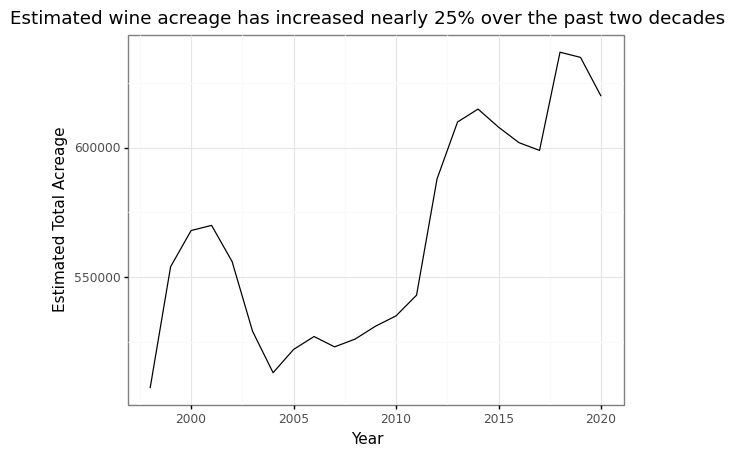

<ggplot: (679769070)>

In [3]:
df = pd.read_csv('california_wine_acreage.csv')

df.rename(columns={'* Estimated Total': 'Estimated Total'}, inplace=True)
df = df[df['Year'] >= 1998]
df['Estimated Total'] = pd.to_numeric(df['Estimated Total'].str.replace(',',''))
print(df)

display(
    ggplot(df,
       aes('Year', 'Estimated Total'))
       + geom_line()
       + theme_bw()
       + labs(
           y='Estimated Total Acreage',
           title='Estimated wine acreage has increased nearly 25% over the past two decades'
       )
)

/Users/vincentvanbuskirk/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 258 rows containing missing values.


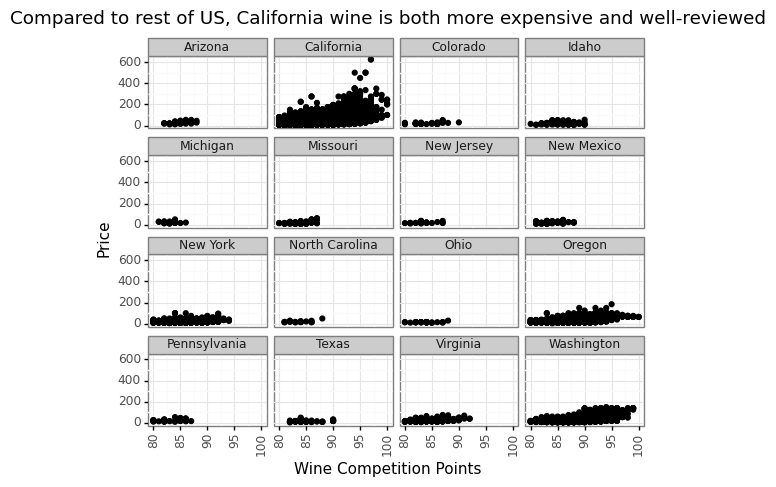

<ggplot: (706732379)>

In [8]:
df = pd.read_csv('winemag-data_first150k.csv')
df = df.drop("Unnamed: 0", axis=1)
df = df.drop(13318)

santa_barbara = df[df.region_1 == 'Santa Barbara']
santa_barbara_points = santa_barbara.points.mean()
grouped = df.groupby('region_1').points.mean()

us_data = df[df.country == 'US']
us_data = us_data[~us_data.province.isin(['America', 'Iowa', 'Connecticut', 'Iowa', 'Kentucky', 'Massachusetts', 'Nevada', 'Vermont', 'Washington-Oregon'])]

display(
    ggplot(us_data,
       aes('points', 'price'))
       + geom_point()
       + facet_wrap('province')
       + theme_bw()
       + labs(
           title='Compared to rest of US, California wine is both more expensive and well-reviewed',
           x='Wine Competition Points',
           y='Price'
       )
       + theme(axis_text_x=element_text(rotation=90))
)

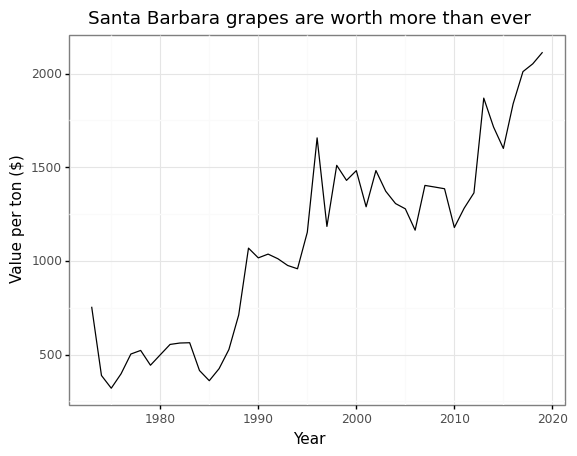

<ggplot: (686405105)>

In [5]:
df = pd.read_csv('wine_value_per_ton.csv')

display(
    ggplot(df,
      aes('Year', 'Value per ton'))
      + geom_line()
      + theme_bw()
      + labs(
          title='Santa Barbara grapes are worth more than ever',
          y = 'Value per ton ($)'
      )
)